# 0. Environment

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Getting the FSD Dataset


In [ ]:
import requests
import os
from concurrent.futures import ThreadPoolExecutor

def download_file(url, dest_folder):
  """
  Downloads a file from a given URL and saves it to a destination folder.

  Args:
  - url (str): The URL of the file to download.
  - dest_folder (str): The destination folder where the file should be saved.
  """
  if not os.path.exists(dest_folder):
    os.makedirs(dest_folder)

  response = requests.get(url, stream=True)
  filename = os.path.join(dest_folder, url.split('/')[-1])

  with open(filename, 'wb') as file:
    for chunk in response.iter_content(chunk_size=8192):
      file.write(chunk)

  return filename  # return the saved file path

def download_files_in_parallel(url_list, dest_folder):
  """
  Downloads files from a list of URLs in parallel and saves them to a destination folder.

  Args:
  - url_list (list): List of URLs to download.
  - dest_folder (str): The destination folder where files should be saved.

  Returns:
  - list: List of saved file paths.
  """
  with ThreadPoolExecutor() as executor:
    return list(executor.map(download_file, url_list, [dest_folder] * len(url_list)))

download_eval = True
download_dev = True

urls = []
if download_eval:
  urls.append('https://zenodo.org/record/4060432/files/FSD50K.eval_audio.z01')
  urls.append('https://zenodo.org/record/4060432/files/FSD50K.eval_audio.zip')

if download_dev:
  urls.append('https://zenodo.org/record/4060432/files/FSD50K.dev_audio.z01')
  urls.append('https://zenodo.org/record/4060432/files/FSD50K.dev_audio.z02')
  urls.append('https://zenodo.org/record/4060432/files/FSD50K.dev_audio.z03')
  urls.append('https://zenodo.org/record/4060432/files/FSD50K.dev_audio.z04')
  urls.append('https://zenodo.org/record/4060432/files/FSD50K.dev_audio.z05')
  urls.append('https://zenodo.org/record/4060432/files/FSD50K.dev_audio.zip')

downloaded_files = download_files_in_parallel(urls, "/content/")
print(downloaded_files)


['/content/FSD50K.eval_audio.z01', '/content/FSD50K.eval_audio.zip', '/content/FSD50K.dev_audio.z01', '/content/FSD50K.dev_audio.z02', '/content/FSD50K.dev_audio.z03', '/content/FSD50K.dev_audio.z04', '/content/FSD50K.dev_audio.z05', '/content/FSD50K.dev_audio.zip']


In [ ]:
# decompress the eval set:
!zip -s 0 /content/FSD50K.eval_audio.zip --out unsplit.zip
!unzip unsplit.zip

Streaming output truncated to the last 5000 lines.
  inflating: FSD50K.eval_audio/109820.wav  
  inflating: FSD50K.eval_audio/323793.wav  
  inflating: FSD50K.eval_audio/18366.wav  
  inflating: FSD50K.eval_audio/365102.wav  
  inflating: FSD50K.eval_audio/64620.wav  
  inflating: FSD50K.eval_audio/172858.wav  
  inflating: FSD50K.eval_audio/250098.wav  
  inflating: FSD50K.eval_audio/171973.wav  
  inflating: FSD50K.eval_audio/402569.wav  
  inflating: FSD50K.eval_audio/189620.wav  
  inflating: FSD50K.eval_audio/137894.wav  
  inflating: FSD50K.eval_audio/390340.wav  
  inflating: FSD50K.eval_audio/405267.wav  
  inflating: FSD50K.eval_audio/135848.wav  
  inflating: FSD50K.eval_audio/369598.wav  
  inflating: FSD50K.eval_audio/110584.wav  
  inflating: FSD50K.eval_audio/97756.wav  
  inflating: FSD50K.eval_audio/236294.wav  
  inflating: FSD50K.eval_audio/369265.wav  
  inflating: FSD50K.eval_audio/93790.wav  
  inflating: FSD50K.eval_audio/344679.wav  
  inflating: FSD50K.eval_audi

In [ ]:
# decompress dev audio
!zip -s 0 /content/FSD50K.dev_audio.zip --out unsplit.zip
!unzip unsplit.zip

Streaming output truncated to the last 5000 lines.
  inflating: FSD50K.dev_audio/256339.wav  
  inflating: FSD50K.dev_audio/182395.wav  
  inflating: FSD50K.dev_audio/138791.wav  
  inflating: FSD50K.dev_audio/373663.wav  
  inflating: FSD50K.dev_audio/273192.wav  
  inflating: FSD50K.dev_audio/100332.wav  
  inflating: FSD50K.dev_audio/68954.wav  
  inflating: FSD50K.dev_audio/140891.wav  
  inflating: FSD50K.dev_audio/337503.wav  
  inflating: FSD50K.dev_audio/126304.wav  
  inflating: FSD50K.dev_audio/75270.wav  
  inflating: FSD50K.dev_audio/96626.wav  
  inflating: FSD50K.dev_audio/79748.wav  
  inflating: FSD50K.dev_audio/247730.wav  
  inflating: FSD50K.dev_audio/27657.wav  
  inflating: FSD50K.dev_audio/255252.wav  
  inflating: FSD50K.dev_audio/82678.wav  
  inflating: FSD50K.dev_audio/329894.wav  
  inflating: FSD50K.dev_audio/77543.wav  
  inflating: FSD50K.dev_audio/375042.wav  
  inflating: FSD50K.dev_audio/381503.wav  
  inflating: FSD50K.dev_audio/373669.wav  
  inflatin

# 2. Load SegSep and dependencies



In [ ]:
!pip install torchaudio
!pip install torchinfo
!pip install essentia

!pip install git+https://github.com/BenjaminOlsen/SegSep.git

!pip install mir_eval # todo! switch to museval

!pip install gdown


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 30.4 MB/s eta 0:00:00
  Cloning https://github.com/BenjaminOlsen/SegSep.git to /tmp/pip-req-build-bdg6jjq3
  Running command git clone --filter=blob:none --quiet https://github.com/BenjaminOlsen/SegSep.git /tmp/pip-req-build-bdg6jjq3
  Resolved https://github.com/BenjaminOlsen/SegSep.git to commit c88f30a84dcb6efbbc81296cce6cc2c1f36ffc20
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for segsep: filename=segsep-0.0.1-py3-none-any.whl size=30011 sha256=d7deb01e5c3b57382234c94cdd638c1428d863a7d2383b3eb2f8c7ef1c3ed858
  Stored in directory: /tmp/pip-ephem-wheel-cache-92115rhf/wheels/a0/2f/8f/dba880539ed9d8ea8d5a0f672ac052bcc6403224eb0e504512
Successfully built segsep
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mir_eval: filename=mir_

## import packages


In [ ]:
import pytz
import torch
import random
import segsep
import torchaudio
import importlib
import numpy as np
import essentia.standard as es
import matplotlib.pyplot as plt

from statistics import mean

from torchinfo import summary
from datetime import datetime

from segsep.utils import print_tensor_stats, calculate_energy, spectral_centroid_waveform, should_skip_chunk
from segsep.datasets import AudioPairDataset, generate_audio_metadata
from segsep.loss_acc import LOGL2loss_freq, si_snr, L2loss_freq, L1loss_freq, LOGL1loss_freq
from segsep.train_validate import train, validate
from segsep.dino_sep import DinoWrapper

from mir_eval.separation import bss_eval_sources #todo: switch to museval

## define device


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## Get the dataset metadata

In [ ]:
# EITHER ...
!cp /content/drive/MyDrive/dev_audio_metadata.json .
!cp /content/drive/MyDrive/eval_audio_metadata.json .

In [ ]:

# ...OR
!gdown 1--x0zlhVU-XgKK2wgIia9pBHaBUQnk5C # dev_audio_metadata.json
!gdown 11erbFCd-tlN4jRSdWjCynQ-1zfblU9y2 # eval_audio_metadata.json

Downloading...
From: https://drive.google.com/uc?id=1--x0zlhVU-XgKK2wgIia9pBHaBUQnk5C
To: /content/dev_audio_metadata.json
100% 24.2M/24.2M [00:00<00:00, 162MB/s]
Downloading...
From: https://drive.google.com/uc?id=11erbFCd-tlN4jRSdWjCynQ-1zfblU9y2
To: /content/eval_audio_metadata.json
100% 6.01M/6.01M [00:00<00:00, 80.5MB/s]


For the STFT to result in a tensor of precisely spec_dim shape, with `spec_dim[0]` time frames and `spec_dim[1]` frequency bins then the following must be true:

With `center=True` for the stft, each of the input audio is padded such that the kth frame is centered at index `k*hop_len` samples. Therefore, to have precisely `spec_len[0]` frames, the last sample should have index value `(spec_len[0]-1)`, so the audio length input to the STFT must be equal to `(spec_len[0]-1)*hop_len`.

(Conversely, the time bin of the corresponding

This input to the STFT is the *output* of the downsampler, so if we have a downsampling ratio of `ρ`, and an input audio sample count of `chunk_size`, then the number of samples in the downsampled audio is `chunk_size / ρ`, which must be equal to `(spec_len[0]-1)*hop_len`

For real valued signals, the FFT is symetrical, and returns only the values for `ω` in `[0, 1, ... n_fft//2 + 1]` Therefore `n_fft = 2 * (spec_dim[1] - 1)`

---

In a blind, zero-shot setting SAM doesn't seem to generalize very well to audio. It seems to attempt to group obvious visual features together, but stumbles on the general spectral mixing that sound exhibits. This is, perhaps, the main difficulty of applying semantic segmentation models to sound: in those datasets, there is typically one class outcome per pixel of the output segmentation map. Indeed, there are probabilities* generated for each output class, which are then thresholded in order to producce the final map, but the cost is calculated (SAUCE - DOUBLE CHECK THIS) using cross-entropy loss

# Load DinoWrapper Model

In [ ]:
model = DinoWrapper(spec_dim=(448,448),
                   sample_rate=44100,
                   resample_rate=22050).to(device)

Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vitl14/dinov2_vitl14_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vitl14_pretrain.pth
100%|██████████| 1.13G/1.13G [00:07<00:00, 154MB/s]


DinoWrapper model n_fft: 894, win len: 894, hop len: 111, sample/resample: 2.0 -> input_chunk_size 99234.0


### Load saved checkpoint, if desired

In [ ]:
load_saved_model = True

if load_saved_model:
  #checkpoint_path = '/content/drive/MyDrive/models/intermediate_epoch_4_DINOV2_Head_training_run2-LOGL2loss_freq-lr_1e-05.pth'
  checkpoint_path = '/content/drive/MyDrive/models/final_epoch_15_DINOV2_Head_training_run4-LOGL2loss_freq-lr_1e-05.pth'

  print(f"loading {checkpoint_path}")
  checkpoint = torch.load(checkpoint_path)
  learning_rate = 1e-5 #checkpoint['learning_rate']
  model.load_state_dict(checkpoint['model_state_dict'])
  model.to(device)

  ##### SET TRAINABLE PARAMETERS PROPERLY
  trainable_parameters = list(model.classlayer_448.parameters()) + list(model.to_448.parameters()) + list(model.conv2seg.parameters()) + list(model.dinov2.parameters())
  optimizer = torch.optim.Adam(trainable_parameters, lr=learning_rate, weight_decay=0)

  # TODO: check param groups matching, this FAILS if you change the trainable parameters from the saved checkpoint's date
#  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

  epoch = checkpoint['epoch']
  train_losses = checkpoint['train_loss']
  test_losses = checkpoint['test_loss']
  train_accs = checkpoint['train_acc']
  test_accs = checkpoint['test_acc']
  save_time = checkpoint['save_time']
  best_test_loss = min(test_losses)
  best_train_loss = min(train_losses)

  print(f"train_loss: {train_losses}\ntest_loss: {test_losses}\ntrain_acc: {train_accs}\ntest_acc: {test_accs} \nbest test loss: {best_test_loss} \nbest train loss: {best_train_loss} \nsave_time: {save_time}")

loading /content/drive/MyDrive/models/final_epoch_15_DINOV2_Head_training_run4-LOGL2loss_freq-lr_1e-05.pth
train_loss: [0.0003047861259569286, 0.0003043891957124781, 0.000302342401175003, 0.0003019771841612729, 0.0003006098461135612, 0.00030200760227146325, 0.0003005343813157725, 0.0003022270922520911, 0.0003014581508152828, 0.0003053166014493535, 0.0003020121198996099, 0.0003018702497992507, 0.00030025958900627733, 0.0003019667472186441, 0.00029871067044829686, 0.0003012710040326452, 0.00030093674146317885, 0.0002979784539827965, 0.0002992640684512746, 0.0003002897501622978]
test_loss: [0.00039242034775682885, 0.0004013795251499167, 0.00040355525434727517, 0.0003914154343675095, 0.00039842225436579286, 0.0003990028036212935, 0.000392828137647358, 0.00039238701481330624, 0.0003939277515806266, 0.0003919647257488899, 0.0004001367681070393, 0.00039541405691511576, 0.0004001853730137029, 0.0003966609127505987, 0.0003984403712878773, 0.000391948418890935, 0.00039847999940385246, 0.00040109

In [ ]:
## Just for adding new parameters to the saved optimizer, if I add parameters to the
## next round of training::

trainable_parameters = list(model.classlayer_448.parameters()) + list(model.to_448.parameters()) + list(model.conv2seg.parameters()) + list(model.dinov2.parameters())
optimizer = torch.optim.Adam(trainable_parameters, lr=learning_rate, weight_decay=0)

optim_state = checkpoint['optimizer_state_dict']

# Separate the parameters
old_params = [p for name, p in model.named_parameters() if 'dinov2' not in name]
new_params = [p for name, p in model.named_parameters() if 'dinov2' in name]

# Instantiate the optimizer with two parameter groups
optimizer = torch.optim.Adam([
    {'params': old_params},
    {'params': new_params, 'lr': learning_rate}
])

optimizer.load_state_dict(optim_state)

ValueError: ignored

In [ ]:
print("Number of param groups in optimizer:", len(optimizer.param_groups))
print("Number of param groups in state dict:", len(optim_state['param_groups']))


Number of param groups in optimizer: 1
Number of param groups in state dict: 2


In [ ]:
x = torch.rand(3, model.input_chunk_size)
pred_audio, mix_spec_in, phase_in, pred_filtered_mag, pred_mask_upscaled = model(audio_in=x.to(device),
                                                                                 debug=True)

forward pass audio in shape: torch.Size([3, 99234])
self.encoder output shape: torch.Size([3, 448, 448])
mix_spec before dino pass: torch.Size([1, 3, 448, 448])
dino output features: torch.Size([1, 1024, 1024])
feature transformer input shape: torch.Size([1, 1024, 1024]) in_channels, height, width
feature transformerx.shape after flatten the height and width into the sequence dimension torch.Size([1024, 1024])
feature transformerx.shape after swapping sequence/channel dimensions torch.Size([1024, 1024]) num_tokens, in_channels
feature transformerx.shape after transformer pass on the token dimension and adding batch dimtorch.Size([1024, 1, 1024]) num_tokens, batch idx in_channels
feature transformerx.shape back to batch, in_channels, num_tokens: torch.Size([1, 1024, 1024])
feature transformerx.shape after convolution along the token dimension: torch.Size([1, 512, 1024])
feature transformerx.shape back to 3D view torch.Size([1, 512, 32, 32]) [num channels, feature map width, height]
outp

In [ ]:
summary(model=model,
        input_size=(3, model.input_chunk_size),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
DinoWrapper (DinoWrapper)                                    [3, 99234]           [3, 99234]           25,445,760           True
├─Resample (downsampler)                                     [3, 99234]           [3, 49617]           --                   --
├─DinoVisionTransformer (dinov2)                             --                   --                   1,404,928            True
│    └─PatchEmbed (patch_embed)                              [1, 3, 448, 448]     [1, 1024, 1024]      --                   True
│    │    └─Conv2d (proj)                                    [1, 3, 448, 448]     [1, 1024, 32, 32]    603,136              True
│    │    └─Identity (norm)                                  [1, 1024, 1024]      [1, 1024, 1024]      --                   --
│    └─ModuleList (blocks)                                   --                   --            

# Helper functions

In [ ]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'.")

In [ ]:
fsd_eval_location = '/content/FSD50K.eval_audio'
eval_metadata_json = '/content/eval_audio_metadata.json'
fsd_dev_location = '/content/FSD50K.dev_audio'
dev_metadata_json = '/content/dev_audio_metadata.json'

walk_through_dir(fsd_dev_location)
walk_through_dir(fsd_eval_location)


There are 0 directories and 40966 files in '/content/FSD50K.dev_audio'.
There are 0 directories and 10231 files in '/content/FSD50K.eval_audio'.


In [ ]:
generate_audio_metadata(fsd_dev_location, 'dev_metadata_json_test.json', verbose=False)

In [ ]:
test_dataset = AudioPairDataset(audio_dir=fsd_eval_location,
                           json_path=eval_metadata_json,
                           centroid_diff_hz=4000.0,
                           min_duration_s = model.input_chunk_size/model.resample_rate,
                           dummy_mode=False)

found 6719 files of length 4.500408163265306s or longer


# Run Zero Shot Prediction

In [ ]:
# run prediction
rand_idx = random.randint(0, len(test_dataset)-1)

mix, longer_audio, padded_audio, info_long, info_short, pad_offset = test_dataset.get_info(rand_idx)
print(f'choosing idx {rand_idx}; long: {info_long["filename"]}, short: {info_short["filename"]}')

sr_l = info_long["sample_rate"]
sr_s = info_short["sample_rate"]
if (sr_l != sr_s):
  print(f"watch out, sample rate difference between audios: {sr_l} vs. {sr_s}")

# sample rate
sr=sr_l

print(f"mix len: {mix.shape}, longer: {longer_audio.shape}, shorter: {padded_audio.shape}, long info: {info_long}, short info: {info_short}, offset: {pad_offset}")

with torch.inference_mode():
  # trim input audio to ideal chunk size
  start_idx = 0
  while start_idx < mix.shape[1] - model.input_chunk_size:

    mix_chunk = mix[:, start_idx:start_idx+model.input_chunk_size]
    longer_audio_chunk = longer_audio[:,  start_idx:start_idx+model.input_chunk_size]

    #just for info about how much trimming is going on
    trim_size_l = longer_audio.shape[1] - model.input_chunk_size
    print(f"trimming {trim_size_l} samples = {trim_size_l/sr:.4f}s: ({longer_audio.shape[1]/sr:.4f}s -> {longer_audio_chunk.shape[1]/sr:.4f}s) from  audio to fit into model chunk")

    padded_audio_chunk = padded_audio[:, start_idx:start_idx+model.input_chunk_size]
    print(f"trimming {padded_audio.shape[1] - model.input_chunk_size} samples from padded audio to fit into model chunk")

    if should_skip_chunk(padded_audio_chunk):
      print(f"no energy in shorter audio chunk idx {start_idx}->{start_idx+model.input_chunk_size}")
      start_idx += model.input_chunk_size
    else:
      print(f"plenty of energy in shorter audio chunk idx {start_idx}->{start_idx+model.input_chunk_size}")
      break

  # if, finally, there is still nothing in the padded audio chunk, there's a problem
  if should_skip_chunk(padded_audio_chunk):
    print(f"NO audio energy in shorter audio! check yourself")

  # get the spectra for the different chunks
  spec_mix = model.encoder(mix_chunk.to(device))[0]
  spec_long = model.encoder(longer_audio_chunk.to(device))[0]
  spec_short = model.encoder(padded_audio_chunk.to(device))[0]

  ### TODO
  ### FIX THIS CENTROID CACA!!!!!!
  #####

  """
  # get the spectral centroid of the audio chunks
  long_chunk_info = spectral_centroid_waveform(longer_audio_chunk, sample_rate=sr, n_fft=model.n_fft, hop_length=model.hop_length)
  short_chunk_info = spectral_centroid_waveform(padded_audio_chunk, sample_rate=sr, n_fft=model.n_fft, hop_length=model.hop_length)
  print(f"long chunk info: {long_chunk_info}")
  print(f"short chunk info: {short_chunk_info}")



  # choose x, y to be point inside shorter audio chunk
  time_spectroid_idx = short_chunk_info["time_centroid_s"] * sr / model.hop_length
  # frequency = i * (sample_rate / n_fft)
  freq_spectroid_idx = short_chunk_info["spectral_centroid_hz"] * model.n_fft / sr

  print(f"time spec idx: {time_spectroid_idx}, freq spec idx: {freq_spectroid_idx}")

  input_point = torch.tensor((time_spectroid_idx, freq_spectroid_idx)).unsqueeze(0).unsqueeze(0).unsqueeze(0)
  """

  # add a channel to the audio to fit with the SAM input tensor dimensions
  mix_3ch = torch.cat([mix_chunk, mix_chunk, 1-mix_chunk], dim=0)

  pred_audio, mix_spec_in, phase_in, pred_filtered_mag, pred_mask_upscaled = model(mix_3ch.to(device),
                                                                             debug=True)


  pred_spec = model.encoder(pred_audio)

  print_tensor_stats(spec_long, "spec_long")
  print_tensor_stats(spec_short, "spec_long")
  print_tensor_stats(pred_filtered_mag, "pred_filtered_mag")
  print_tensor_stats(mix_3ch, "mix 3 channel")
  print_tensor_stats(pred_mask_upscaled, "predicted mask")
  print_tensor_stats(pred_audio, "predicted audio")
  print(f"info short: {info_short}")
  print(f"info long: {info_long}")


choosing idx 145; long: 119555.wav, short: 245550.wav
mix len: torch.Size([1, 1052102]), longer: torch.Size([1, 1052102]), shorter: torch.Size([1, 1052102]), long info: {'filename': '119555.wav', 'sample_cnt': 1052102, 'sample_rate': 44100, 'spectral_centroid': {'max': 10397.531718232549, 'min': 2409.454575487703, 'mean': 5589.208958789867, 'std': 1157.3734881855385}, 'spectral_bandwidth': {'max': 7898.680834398281, 'min': 4038.2804226982216, 'mean': 6217.499395629336, 'std': 1280.7333412736828}, 'spectral_flatness': {'max': 0.7460861802101135, 'min': 0.0, 'mean': 0.33298523909527095, 'std': 0.17060414442770191}, 'spectral_contrast': {'max': -0.5700873732566833, 'min': -0.9278876781463623, 'mean': -0.7980033262613281, 'std': 0.11049340559423289}}, short info: {'filename': '245550.wav', 'sample_cnt': 34568, 'sample_rate': 44100, 'spectral_centroid': {'max': 1400.724309442928, 'min': 640.4227507638451, 'mean': 767.7206499519417, 'std': 103.07024442668028}, 'spectral_bandwidth': {'max': 1

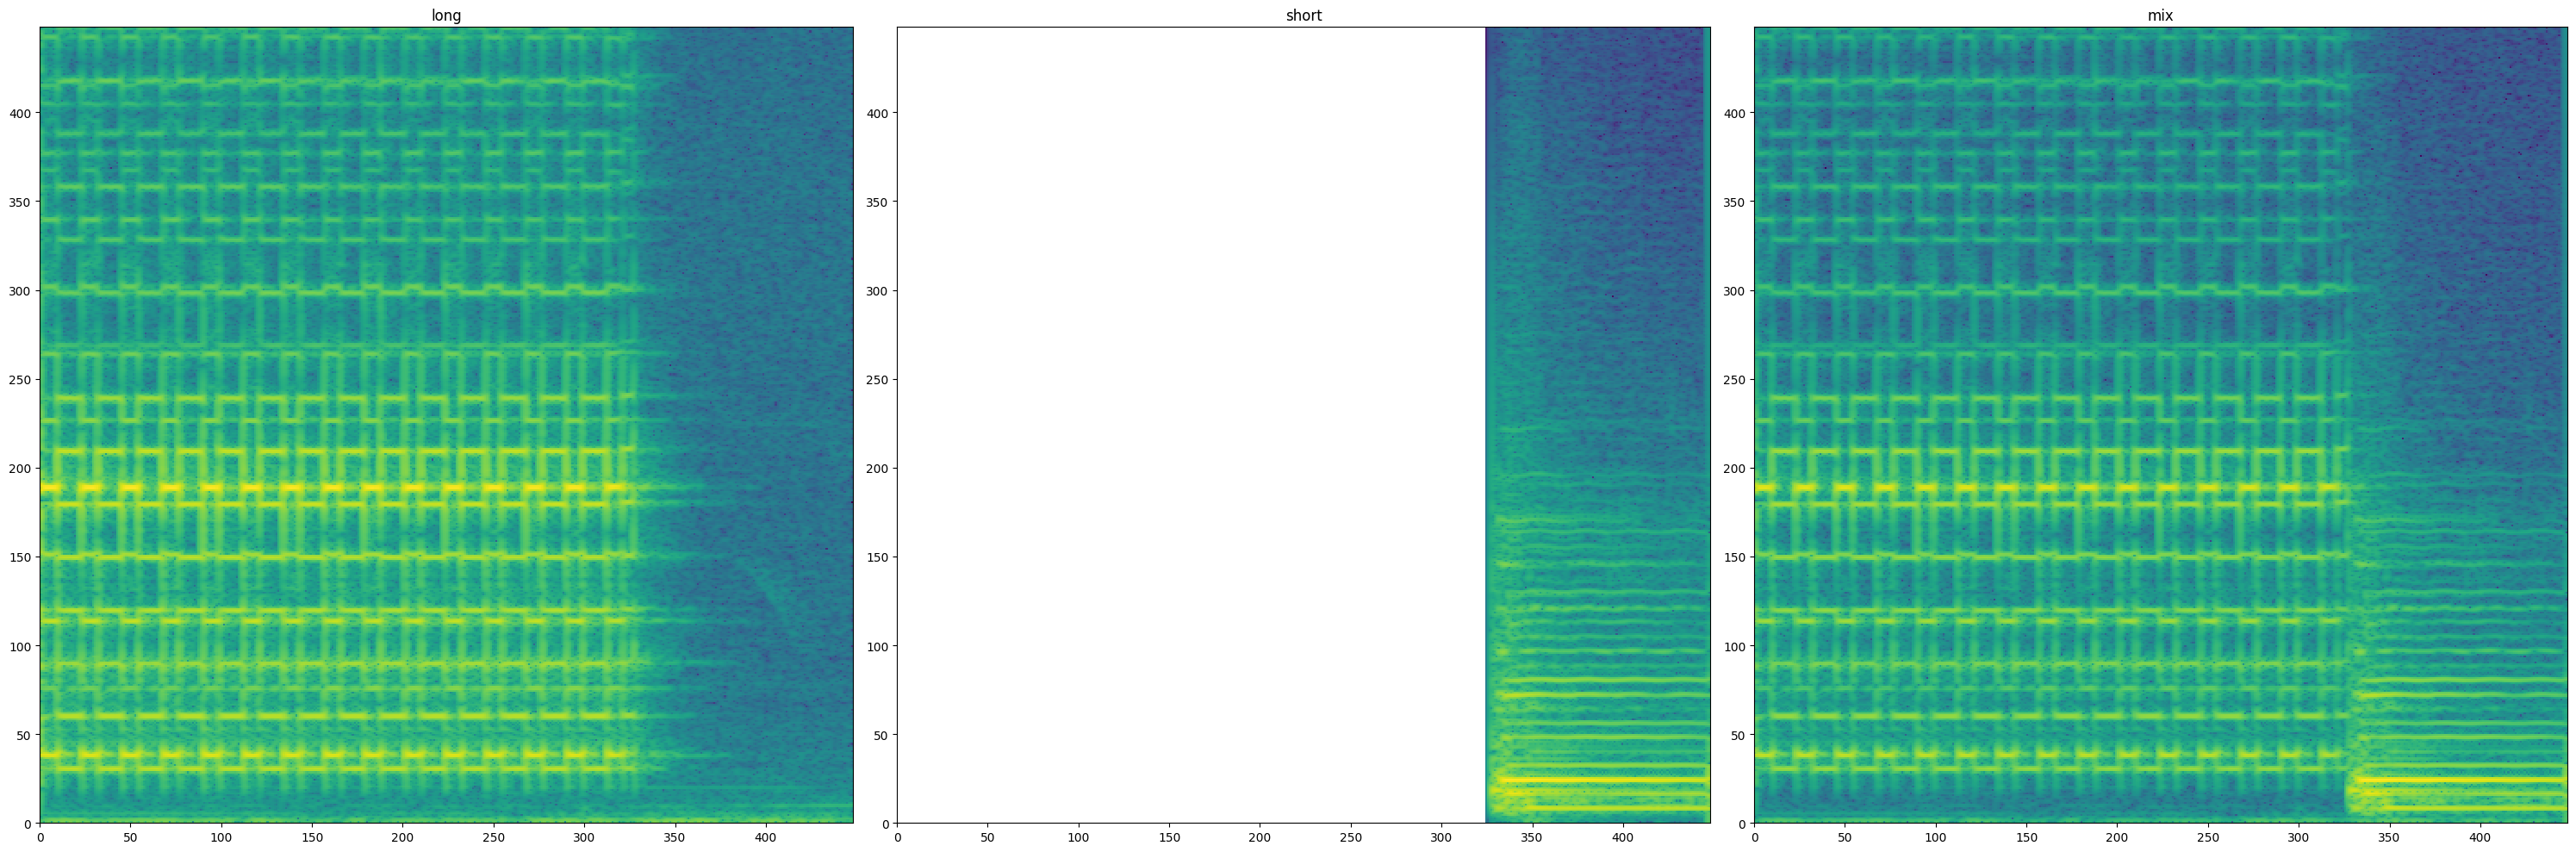

In [ ]:
 # plot input audio:
fig, axs = plt.subplots(1, 3, figsize=(30,10))

axs[0].pcolormesh(10*torch.log10(spec_long.squeeze()).detach().cpu())
axs[0].set_title('long')

axs[1].pcolormesh(10*torch.log10(spec_short.squeeze()).detach().cpu())
axs[1].set_title('short')
dr = model.sample_rate / model.resample_rate #downsample ratio

axs[1].plot

axs[2].pcolormesh(10*torch.log10(spec_mix.squeeze()).detach().cpu())
axs[2].set_title('mix')


plt.tight_layout()
plt.show()

In [ ]:
print_tensor_stats(spec_long, "spec long")
print_tensor_stats(spec_short, "spec short")
print_tensor_stats(spec_mix, "spec mix")

spec long            - torch.float32   - shape: torch.Size([1, 448, 448])     (magnitude) max:   6.8472, min   0.0000, mean   0.0327, std:   0.1721
spec short           - torch.float32   - shape: torch.Size([1, 448, 448])     (magnitude) max:   0.8119, min   0.0000, mean   0.0031, std:   0.0193
spec mix             - torch.float32   - shape: torch.Size([1, 448, 448])     (magnitude) max:   6.8472, min   0.0000, mean   0.0351, std:   0.1727


In [ ]:
def print_tensor_stats(t, title=None):
  tensor_type = t.dtype
  shape = t.shape
  t = torch.abs(t)
  max = torch.max(t)
  min = torch.min(t)
  mean = torch.mean(t.float())
  std = torch.std(t.float())
  print(f"{title:20} - {str(tensor_type):15} - shape: {str(shape):29} (magnitude) max: {max:8.4f}, min {min:8.4f}, mean {mean:8.4f}, std: {std:8.4f}")

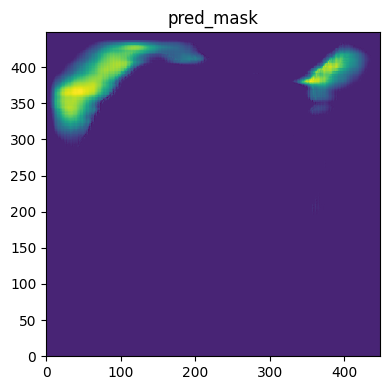

In [ ]:
# plot predicted masks:

fig, axs = plt.subplots(1,1, figsize=(4,4))
axs.pcolormesh(pred_mask_upscaled[0].squeeze().detach().cpu())
axs.set_title('pred_mask')
plt.tight_layout()
plt.show()

In [ ]:
# plot predicted audio spectrum:
fig, axs = plt.subplots(1, 3, figsize=(30,6))

axs[0].pcolormesh(10*torch.log10(pred_spec.squeeze()[0]).detach().cpu())
axs[0].set_title('pred mag 1')

axs[1].pcolormesh(10*torch.log10(pred_spec.squeeze()[1]).detach().cpu())
axs[1].set_title('pred mag 2')

axs[2].pcolormesh(10*torch.log10(pred_spec.squeeze()[2]).detach().cpu())
axs[2].set_title('pred mag 3')
plt.tight_layout()
plt.show()

In [ ]:
import IPython
sr = model.sample_rate
print("mix")
IPython.display.display(IPython.display.Audio(mix, rate=sr))

print("long")
IPython.display.display(IPython.display.Audio(longer_audio, rate=sr))

print("padded")

IPython.display.display(IPython.display.Audio(padded_audio, rate=sr))

mix


long


padded


# Train

## Define training/testing loop

sync with [SAM notebook](https://colab.research.google.com/drive/1oTULlpqwyvzECeED4V3Hb1-mNsrBrp80#scrollTo=9Mb8DCA3iqbM&uniqifier=1) >> move to git mate.

In [ ]:
#### Define Training and Testing Loops:

from tqdm.auto import tqdm
from segsep.utils import should_skip_chunk
from torch.utils.data import SubsetRandomSampler

# --------------------------------------------------------------------------------------------------
def _train_dinov2(model, dataloader, optimizer, loss_fn, acc_fn, device, upscale_mask=False, verbose=False):
  model.train()
  epoch_loss = 0
  epoch_acc = 0

  # automatic mixed precision scaler:
  scaler = torch.cuda.amp.GradScaler()

  # choose chunks of audio of chunk_size samples such that
  # each chunk results in a STFT of model.spec_dim[0] time bins
  hop_len = model.hop_length
  hop_cnt = model.spec_dim[0]
  chunk_size = model.input_chunk_size
  print(f"choosing audio of {chunk_size} samples -> {chunk_size/model.resample_rate:.5f}s")

  for idx, (mix_audio, source_audio) in enumerate(tqdm(dataloader)):
    optimizer.zero_grad()
    # add a 3rd channel to each audio tensor:
    if source_audio.shape[1] == 2:
      source_audio_ch3=(source_audio[:,0]-source_audio[:,1]).unsqueeze(0)
      source_audio = torch.cat((source_audio, source_audio_ch3), dim=1)
    elif source_audio.shape[1] == 1:
        source_audio = torch.cat((source_audio, source_audio, source_audio), dim=1)
    if mix_audio.shape[1] == 2:
      mix_audio_ch3=(mix_audio[:,0]-mix_audio[:,1]).unsqueeze(0)
      mix_audio = torch.cat((mix_audio, mix_audio_ch3), dim=1)
    elif mix_audio.shape[1] == 1:
      mix_audio = torch.cat((mix_audio, mix_audio, mix_audio), dim=1)


    track_loss = 0
    track_acc = 0
    chunk_cnt = 0
    skip_chunk_cnt = 0
    sample_cnt = mix_audio.shape[2] # [batch, channel, audio]

    mix_audio = mix_audio.squeeze().to(device)
    source_audio = source_audio.squeeze().to(device)
    # omit last chunk if its size would be less than chunk_size
    for start_idx in range(0, sample_cnt-chunk_size+1, chunk_size):
      end_idx = start_idx + chunk_size
      mix_chunk = mix_audio[:, start_idx:end_idx]
      source_chunk = source_audio[:, start_idx:end_idx]
      #print(f"doing idx {start_idx}:{end_idx} - {float(end_idx)/mix_audio_3.shape[1]:.3f}")

      if should_skip_chunk(mix_chunk) or should_skip_chunk(source_chunk):
        skip_chunk_cnt += 1
        continue

      #print(f"mix chunk shape {mix_chunk.shape}")
      if torch.isnan(mix_chunk).any():
        print("input data contains nan!")
        mix_chunk = torch.nan_to_num(mix_chunk)

      # context for automatic mixed precision
      with torch.cuda.amp.autocast():
        pred_audio, mix_spec_in, phase_in, pred_filtered_mag, pred_mask_upscaled = model(audio_in=mix_chunk,
                                                                                            debug=verbose)
        if torch.isnan(pred_audio).any():
          print("prediction contains nan!")
          continue
          #pred_audio = torch.nan_to_num(pred_audio)

        trim_idx = min(pred_audio.shape[1], source_chunk.shape[1])

        # calculate loss/acc on SPEC
        source_spec = model.encoder(source_chunk)[0][0] #mag spec, phase spec
        loss = loss_fn(pred_filtered_mag.squeeze()[0], source_spec)
        acc = acc_fn(pred_filtered_mag.squeeze()[0], source_spec)

      epoch_loss += loss.item()
      track_loss += loss.item()

      epoch_acc += acc.item()
      track_acc += acc.item()
      chunk_cnt += 1

      # traditional backward pass
      #loss.backward()
      #optimizer.step()

      # backward pass with automatic mixed precision
      scaler.scale(loss).backward()
      scaler.step(optimizer)
      scaler.update()

      del pred_audio
      del loss
      del acc

    del mix_audio
    del source_audio

    torch.cuda.empty_cache()
    if verbose:
      print(f"TRAIN track {idx}/{len(dataloader)} loss: {track_loss}, track acc: {track_acc:.4f}, skip chunk cnt: {skip_chunk_cnt}/{chunk_cnt}")
  return epoch_loss / len(dataloader), epoch_acc / len(dataloader)

# --------------------------------------------------------------------------------------------------
def _validate_dinov2(model, dataloader, loss_fn, acc_fn, device, subset_proportion=0.1, upscale_mask=False, verbose=False):
  model.eval()
  epoch_loss = 0
  epoch_acc = 0

  with torch.inference_mode():

    subset_sample_cnt = int(len(dataloader) * subset_proportion)
    subset_indices = torch.randperm(len(dataloader))[:subset_sample_cnt]
    subset_sampler = SubsetRandomSampler(subset_indices)
    subset_dataloader = torch.utils.data.DataLoader(dataloader.dataset,
                                                    batch_size=dataloader.batch_size,
                                                    sampler=subset_sampler,
                                                    num_workers=dataloader.num_workers,
                                                    pin_memory=dataloader.pin_memory)

    # choose chunks of audio of chunk_size samples such that
    # each chunk results in a STFT of model.spec_dim[0] time bins
    hop_len = model.hop_length
    hop_cnt = model.spec_dim[0]
    chunk_size = model.input_chunk_size

    #print(f"choosing audio of {chunk_size} samples -> {chunk_size/model.resample_rate:.5f}s")

    for idx, (mix_audio, source_audio) in enumerate(tqdm(subset_dataloader)):
      # add a 3rd channel to each audio tensor:
      if source_audio.shape[1] == 2:
        source_audio_ch3=(source_audio[:,0]-source_audio[:,1]).unsqueeze(0)
        source_audio = torch.cat((source_audio, source_audio_ch3), dim=1)
      elif source_audio.shape[1] == 1:
          source_audio = torch.cat((source_audio, source_audio, source_audio), dim=1)
      if mix_audio.shape[1] == 2:
        mix_audio_ch3=(mix_audio[:,0]-mix_audio[:,1]).unsqueeze(0)
        mix_audio = torch.cat((mix_audio, mix_audio_ch3), dim=1)
      elif mix_audio.shape[1] == 1:
        mix_audio = torch.cat((mix_audio, mix_audio, mix_audio), dim=1)

      track_loss = 0
      track_acc = 0
      chunk_cnt = 0
      skip_chunk_cnt = 0
      sample_cnt = mix_audio.shape[2] # [batch, channel, audio]

      mix_audio = mix_audio.squeeze().to(device)
      source_audio = source_audio.squeeze().to(device)
      # omit last chunk if its size would be less than chunk_size
      for start_idx in range(0, sample_cnt-chunk_size+1, chunk_size):
        end_idx = start_idx + chunk_size
        mix_chunk = mix_audio[:, start_idx:end_idx]
        source_chunk = source_audio[:, start_idx:end_idx]
        #print(f"doing idx {start_idx}:{end_idx} - {float(end_idx)/mix_audio.shape[1]:.3f}")

        if should_skip_chunk(mix_chunk) or should_skip_chunk(source_chunk):
          skip_chunk_cnt += 1
          continue

        #print(f"mix chunk shape {mix_chunk.shape}")
        if torch.isnan(mix_chunk).any():
          print("input data contains nan!")
          continue
          #mix_chunk = torch.nan_to_num(mix_chunk)
        pred_audio, mix_spec_in, phase_in, pred_filtered_mag, pred_mask_upscaled = model(audio_in=mix_chunk)
        if torch.isnan(pred_audio).any():
          print("predicted audio contains nan!")
          continue
        trim_idx = min(pred_audio.shape[1], source_chunk.shape[1])

        # calculate loss/acc on SPEC
        source_spec = model.encoder(source_chunk)[0][0]
        loss = loss_fn(pred_filtered_mag.squeeze()[0], source_spec)
        acc = acc_fn(pred_filtered_mag.squeeze()[0], source_spec)

        epoch_loss += loss.item()
        track_loss += loss.item()

        epoch_acc += acc.item()
        track_acc += acc.item()

        chunk_cnt += 1

        # madre mia
        del pred_audio
        del loss
      del mix_audio
      del source_audio
      torch.cuda.empty_cache()
      if verbose:
        print(f"TEST track {idx}/{len(subset_dataloader)} loss: {track_loss:.8f}, track acc: {track_acc:.4f}, skip chunk cnt: {skip_chunk_cnt}/{chunk_cnt}")
  return epoch_loss / len(subset_dataloader), epoch_acc / len(subset_dataloader)

# train

In [ ]:
# reload model if you want

#model = DinoWrapper(spec_dim=(256,256),
#                   sample_rate=44100,
#                   resample_rate=22050).to(device)

# Freeze parameters
for name, param in model.named_parameters():
  if name.startswith("dinov2"):
    param.requires_grad_(True)
  elif name.startswith("classlayer_448"):
    param.requires_grad_(True)
  elif name.startswith("to_448"):
    param.requires_grad_(True)
  elif name.startswith("conv2seg"):
    param.requires_grad_(True)
  else: # all else turn off grad
    param.requires_grad_(False)


# TODO: calculate from checkpoint
print(f"Resetting loss tracking, optimizer")
train_losses = []
test_losses = []
train_accs = []
test_accs = []
best_test_loss = float('inf') # min(test_losses)
best_train_loss = float('inf') # min(train_losses)

# Initialize stats tracking ONLY if not loading new model!
if not load_saved_model:

  learning_rate = 1e-5

  ###############################################
  # Set trainable parameters!!!!!
  trainable_parameters = list(model.classlayer_448.parameters()) + list(model.to_448.parameters()) + list(model.conv2seg.parameters()) + list(model.dinov2.parameters())
  optimizer = torch.optim.Adam(trainable_parameters, lr=learning_rate, weight_decay=0)




###. trainin' it

train_audio_metadata_json="dev_audio_metadata.json"
test_audio_metadata_json="eval_audio_metadata.json"
fsd_train_location="/content/FSD50K.dev_audio"
fsd_test_location="/content/FSD50K.eval_audio"

##################################################
# Set the model name!
model_name = "DINOV2_finetuning_run4.2"

centroid_diff_hz = 3000.0

train_dataset = AudioPairDataset(audio_dir=fsd_train_location,
                                json_path=train_audio_metadata_json,
                                centroid_diff_hz=centroid_diff_hz,
                                min_duration_s = model.input_chunk_size/model.resample_rate,
                                dummy_mode=False)

test_dataset = AudioPairDataset(audio_dir=fsd_test_location,
                                json_path=test_audio_metadata_json,
                                centroid_diff_hz=centroid_diff_hz,
                                min_duration_s = model.input_chunk_size/model.resample_rate,
                                dummy_mode=False)

train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                batch_size=1,
                                                num_workers=0,
                                                shuffle=True)

test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset,
                                                batch_size=1,
                                                num_workers=0,
                                                shuffle=True)


# tracking best loss for stopping condition

patience = 10 # epochs to tolerate lack of improvement
no_improve_counter = 0 # counter to track lack of improvement
loss_name="LOGL2loss_freq"

num_epochs = 199
# Training and validation loop
for epoch in range(num_epochs):
  print(f"starting epoch {epoch}")
  # Training

  train_loss, train_acc = _train_dinov2(model=model,
                                dataloader=train_dataloader,
                                optimizer=optimizer,
                                loss_fn=LOGL2loss_freq,
                                acc_fn=si_snr,
                                device=device,
                                verbose=False)

  mean_train_loss = 0 if len(train_losses) == 0 else mean(train_losses)
  mean_train_acc = 0 if len(train_accs) == 0 else mean(train_accs)

  if train_loss < best_train_loss:
    print(f"~~~Best Train loss! {train_loss} <- {best_train_loss}; delta {best_train_loss-train_loss}")
    best_train_loss = train_loss

  delta_loss = train_loss - mean_train_loss
  delta_acc = train_acc - mean_train_acc
  print(f"epoch {epoch} train done -> avg train_loss: {train_loss:.5e} (delta {delta_loss:.5e}), acc: {train_acc:.5e} (delta {delta_acc:.5e})")
  train_losses.append(train_loss)
  train_accs.append(train_acc)

  print(f"mean train_loss so far: {mean(train_losses):.5e}, acc: {mean(train_accs):.5e}")

  # Validation
  test_loss, test_acc = _validate_dinov2(model=model,
                                  dataloader=test_dataloader,
                                  loss_fn=LOGL2loss_freq,
                                  acc_fn=si_snr,
                                  device=device,
                                  subset_proportion=0.8,
                                  verbose=False)


  if test_loss < best_test_loss:
    print(f"~~~~~~~~~New Best Test Loss! {test_loss:.5e} <- {best_test_loss:.5e} (delta: {test_loss-best_test_loss:.5e})")
    best_test_loss = test_loss
    no_improve_counter = 0

    # save best model
    now = datetime.now()
    date_time = now.strftime("%m-%d-%y_%H:%M:%S")
    loss_name="LOGL2loss_freq"
    checkpoint_path = f'/content/drive/MyDrive/models/best_{model_name}-{loss_name}-lr_{learning_rate}.pth'
    print(f"SAVING checkpoint: {checkpoint_path}")
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_test_loss': best_test_loss,
        'train_loss': train_losses,
        'test_loss': test_losses,
        'train_acc': train_accs,
        'test_acc': test_accs,
        'save_time': date_time,
        'learning_rate': learning_rate
          }, checkpoint_path)

    #hack: save a dummy file with some info in the name so i can see it without being there
    info_path = f'/content/drive/MyDrive/models/new_best_{date_time}-{model_name}-{loss_name}-lr_{learning_rate}.pth'
    torch.save(0, info_path)

  else:
    no_improve_counter += 1
    print(f"no improvement, counter at: {no_improve_counter}")

    #hack: save a dummy file with some info in the name so i can see it without being there
    now = datetime.now()
    date_time = now.strftime("%m-%d-%y_%H:%M:%S")
    info_path = f'/content/drive/MyDrive/models/no_improvement_cnt_{no_improve_counter}_epoch_{epoch}_{date_time}-{model_name}-{loss_name}-lr_{learning_rate}.pth'
    torch.save(0, info_path)

  mean_test_loss = 0 if len(test_losses) == 0 else mean(test_losses)
  mean_test_acc = 0 if len(test_accs) == 0 else mean(test_accs)
  delta_loss = test_loss - mean_test_loss
  delta_acc = test_acc - mean_test_acc
  print(f"epoch {epoch} test done -> avg test_loss: {test_loss:.5e} (delta {delta_loss:.5e}), acc: {test_acc:.5e} (delta {delta_acc:.5e})")
  test_losses.append(test_loss)
  test_accs.append(test_acc)
  print(f"mean test_loss so far: {mean(test_losses):.5e}, acc: {mean(test_accs):.5e}")

  # Print stats
  print(f"Epoch {epoch+1}/{num_epochs}:")
  print(f"Train Loss: {train_loss:.5e}, Train Acc: {train_acc:.5e}")
  print(f"Test Loss: {test_loss:.5e}, Test Acc: {test_acc:.5e}")


  if no_improve_counter > patience:
    print("Early stopping due to no improvement!")

    #hack: save a dummy file with some info in the name so i can see it without being there
    now = datetime.now()
    date_time = now.strftime("%m-%d-%y_%H:%M:%S")
    loss_name="LOGL2loss_freq"
    info_path = f'/content/drive/MyDrive/models/STOPPED_EARLY_{model_name}-{loss_name}-lr_{learning_rate}.pth'
    torch.save({
        'epoch': epoch,
        'train_loss': train_losses,
        'test_loss': test_losses
      }, info_path)
    break

  if (epoch + 1) % 5 == 0:
  # save intermediate checkpoint anyway
    now = datetime.now()
    date_time = now.strftime("%m-%d-%y_%H:%M:%S")
    loss_name="LOGL2loss_freq"
    checkpoint_path = f'/content/drive/MyDrive/models/intermediate_epoch_{epoch}_{model_name}-{loss_name}-lr_{learning_rate}.pth'
    print(f"SAVING checkpoint: {checkpoint_path}")
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_test_loss': best_test_loss,
        'train_loss': train_losses,
        'test_loss': test_losses,
        'train_acc': train_accs,
        'test_acc': test_accs,
        'save_time': date_time,
        'learning_rate': learning_rate
          }, checkpoint_path)

Resetting loss tracking, optimizer
found 20437 files of length 4.500408163265306s or longer
found 6719 files of length 4.500408163265306s or longer
starting epoch 0
choosing audio of 99234 samples -> 4.50041s


  0%|          | 0/20437 [00:00<?, ?it/s]

In [ ]:
# plot the loss & accuracy over the course of training
fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs[0,0].plot(train_losses)
axs[0,0].set_title('train loss')
axs[0,1].plot(train_accs)
axs[0,1].set_title('train acc')
axs[1,0].plot(test_losses)
axs[1,0].set_title('test loss')
axs[1,1].plot(test_accs)
axs[1,1].set_title('test acc')
plt.tight_layout()
plt.show()

In [ ]:
now = datetime.now()
date_time = now.strftime("%m-%d-%y_%H:%M:%S")


loss_name="LOGL2loss_freq"
checkpoint_path = f'/content/drive/MyDrive/models/final_epoch_{epoch}_{model_name}-{loss_name}-lr_{learning_rate}.pth'
print(f"SAVING checkpoint: {checkpoint_path}")
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'best_test_loss': best_test_loss,
    'train_loss': train_losses,
    'test_loss': test_losses,
    'train_acc': train_accs,
    'test_acc': test_accs,
    'save_time': date_time,
    'learning_rate': learning_rate
      }, checkpoint_path)
print(f"done at {date_time}")

SAVING checkpoint: /content/drive/MyDrive/models/final_epoch_15_DINOV2_Head_training_run4-LOGL2loss_freq-lr_1e-05.pth
done at 08-29-23_06:32:57


# train conv2seg as *well*

In [ ]:
model = DinoWrapper(spec_dim=(448,448),
                   sample_rate=44100,
                   resample_rate=22050).to(device)

# Freeze parameters
for name, param in model.named_parameters():
  if name.startswith("dinov2"):
    param.requires_grad_(False)
  elif name.startswith("classlayer_448"):
    param.requires_grad_(True)
  elif name.startswith("to_448"):
    param.requires_grad_(True)
  elif name.startswith("conv2seg"):
    param.requires_grad_(True)
  else: # all else turn off grad
    param.requires_grad_(False)

model_name = "DINOV2_Head_training_run2"



# Initialize stats tracking ONLY if not loading new model!
train_losses = []
test_losses = []
train_accs = []
test_accs = []



learning_rate = 1e-5
best_test_loss = float('inf')
best_train_loss = float('inf')




# Set trainable parameters
trainable_parameters = list(model.classlayer_448.parameters()) + list(model.to_448.parameters()) +list(model.conv2seg.parameters())
optimizer = torch.optim.Adam(trainable_parameters, lr=learning_rate, weight_decay=0)


num_epochs = 199
# Training and validation loop
for epoch in range(num_epochs):
  print(f"starting epoch {epoch}")
  # Training

  train_loss, train_acc = _train_dinov2(model=model,
                                dataloader=train_dataloader,
                                optimizer=optimizer,
                                loss_fn=LOGL2loss_freq,
                                acc_fn=si_snr,
                                device=device,
                                verbose=False)

  mean_train_loss = 0 if len(train_losses) == 0 else mean(train_losses)
  mean_train_acc = 0 if len(train_accs) == 0 else mean(train_accs)

  if train_loss < best_train_loss:
    print(f"~~~Best Train loss! {train_loss} <- {best_train_loss}; delta {best_train_loss-train_loss}")
    best_train_loss = train_loss

  delta_loss = train_loss - mean_train_loss
  delta_acc = train_acc - mean_train_acc
  print(f"epoch {epoch} train done -> avg train_loss: {train_loss:.5e} (delta {delta_loss:.5e}), acc: {train_acc:.5e} (delta {delta_acc:.5e})")
  train_losses.append(train_loss)
  train_accs.append(train_acc)

  print(f"mean train_loss so far: {mean(train_losses):.5e}, acc: {mean(train_accs):.5e}")

  # Validation
  test_loss, test_acc = _validate_dinov2(model=model,
                                  dataloader=test_dataloader,
                                  loss_fn=LOGL2loss_freq,
                                  acc_fn=si_snr,
                                  device=device,
                                  subset_proportion=0.8,
                                  verbose=False)


  if test_loss < best_test_loss:
    print(f"~~~~~~~~~New Best Test Loss! {test_loss:.5e} <- {best_test_loss:.5e} (delta: {test_loss-best_test_loss:.5e})")
    best_test_loss = test_loss
    no_improve_counter = 0

    # save best model
    now = datetime.now()
    date_time = now.strftime("%m-%d-%y_%H:%M:%S")
    loss_name="LOGL2loss_freq"
    checkpoint_path = f'/content/drive/MyDrive/models/best_{model_name}-{loss_name}-lr_{learning_rate}.pth'
    print(f"SAVING checkpoint: {checkpoint_path}")
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_test_loss': best_test_loss,
        'train_loss': train_losses,
        'test_loss': test_losses,
        'train_acc': train_accs,
        'test_acc': test_accs,
        'save_time': date_time,
        'learning_rate': learning_rate
          }, checkpoint_path)

    #hack: save a dummy file with some info in the name so i can see it without being there
    info_path = f'/content/drive/MyDrive/models/new_best_{date_time}-{model_name}-{loss_name}-lr_{learning_rate}.pth'
    torch.save(0, info_path)

  else:
    no_improve_counter += 1
    print(f"no improvement, counter at: {no_improve_counter}")

    #hack: save a dummy file with some info in the name so i can see it without being there
    now = datetime.now()
    date_time = now.strftime("%m-%d-%y_%H:%M:%S")
    info_path = f'/content/drive/MyDrive/models/no_improvement_cnt_{no_improve_counter}_epoch_{epoch}_{date_time}-{model_name}-{loss_name}-lr_{learning_rate}.pth'
    torch.save(0, info_path)

  mean_test_loss = 0 if len(test_losses) == 0 else mean(test_losses)
  mean_test_acc = 0 if len(test_accs) == 0 else mean(test_accs)
  delta_loss = test_loss - mean_test_loss
  delta_acc = test_acc - mean_test_acc
  print(f"epoch {epoch} test done -> avg test_loss: {test_loss:.5e} (delta {delta_loss:.5e}), acc: {test_acc:.5e} (delta {delta_acc:.5e})")
  test_losses.append(test_loss)
  test_accs.append(test_acc)
  print(f"mean test_loss so far: {mean(test_losses):.5e}, acc: {mean(test_accs):.5e}")

  # Print stats
  print(f"Epoch {epoch+1}/{num_epochs}:")
  print(f"Train Loss: {train_loss:.5e}, Train Acc: {train_acc:.5e}")
  print(f"Test Loss: {test_loss:.5e}, Test Acc: {test_acc:.5e}")


  if no_improve_counter > patience:
    print("Early stopping due to no improvement!")

    #hack: save a dummy file with some info in the name so i can see it without being there
    now = datetime.now()
    date_time = now.strftime("%m-%d-%y_%H:%M:%S")
    loss_name="LOGL2loss_freq"
    info_path = f'/content/drive/MyDrive/models/STOPPED_EARLY_{model_name}-{loss_name}-lr_{learning_rate}.pth'
    torch.save({
        'epoch': epoch,
        'train_loss': train_losses,
        'test_loss': test_losses
      }, info_path)
    break

  if (epoch + 1) % 5 == 0:
  # save intermediate checkpoint anyway
    now = datetime.now()
    date_time = now.strftime("%m-%d-%y_%H:%M:%S")
    loss_name="LOGL2loss_freq"
    checkpoint_path = f'/content/drive/MyDrive/models/intermediate_epoch_{epoch}_{model_name}-{loss_name}-lr_{learning_rate}.pth'
    print(f"SAVING checkpoint: {checkpoint_path}")
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_test_loss': best_test_loss,
        'train_loss': train_losses,
        'test_loss': test_losses,
        'train_acc': train_accs,
        'test_acc': test_accs,
        'save_time': date_time,
        'learning_rate': learning_rate
          }, checkpoint_path)


Using cache found in /root/.cache/torch/hub/facebookresearch_dinov2_main


SamWrapper model n_fft: 894, win len: 894, hop len: 111, sample/resample: 2.0 -> input_chunk_size 99234.0
starting epoch 0
choosing audio of 99234 samples -> 4.50041s


  0%|          | 0/20437 [00:00<?, ?it/s]

~~~Best Train loss! 0.0003047861259569286 <- inf; delta inf
epoch 0 train done -> avg train_loss: 3.04786e-04 (delta 3.04786e-04), acc: -1.39482e+01 (delta -1.39482e+01)
mean train_loss so far: 3.04786e-04, acc: -1.39482e+01


  0%|          | 0/5375 [00:00<?, ?it/s]

~~~~~~~~~New Best Test Loss! 3.92420e-04 <- inf (delta: -inf)
SAVING checkpoint: /content/drive/MyDrive/models/best_DINOV2_Head_training_run2-LOGL2loss_freq-lr_1e-05.pth
epoch 0 test done -> avg test_loss: 3.92420e-04 (delta 3.92420e-04), acc: -3.85612e+00 (delta -3.85612e+00)
mean test_loss so far: 3.92420e-04, acc: -3.85612e+00
Epoch 1/199:
Train Loss: 3.04786e-04, Train Acc: -1.39482e+01
Test Loss: 3.92420e-04, Test Acc: -3.85612e+00
starting epoch 1
choosing audio of 99234 samples -> 4.50041s


  0%|          | 0/20437 [00:00<?, ?it/s]

~~~Best Train loss! 0.0003043891957124781 <- 0.0003047861259569286; delta 3.9693024445053553e-07
epoch 1 train done -> avg train_loss: 3.04389e-04 (delta -3.96930e-07), acc: -1.34247e+01 (delta 5.23529e-01)
mean train_loss so far: 3.04588e-04, acc: -1.36864e+01


  0%|          | 0/5375 [00:00<?, ?it/s]

no improvement, counter at: 1
epoch 1 test done -> avg test_loss: 4.01380e-04 (delta 8.95918e-06), acc: -2.59132e+01 (delta -2.20571e+01)
mean test_loss so far: 3.96900e-04, acc: -1.48846e+01
Epoch 2/199:
Train Loss: 3.04389e-04, Train Acc: -1.34247e+01
Test Loss: 4.01380e-04, Test Acc: -2.59132e+01
starting epoch 2
choosing audio of 99234 samples -> 4.50041s


  0%|          | 0/20437 [00:00<?, ?it/s]

~~~Best Train loss! 0.000302342401175003 <- 0.0003043891957124781; delta 2.0467945374751063e-06
epoch 2 train done -> avg train_loss: 3.02342e-04 (delta -2.24526e-06), acc: -1.27358e+01 (delta 9.50631e-01)
mean train_loss so far: 3.03839e-04, acc: -1.33695e+01


  0%|          | 0/5375 [00:00<?, ?it/s]

no improvement, counter at: 2
epoch 2 test done -> avg test_loss: 4.03555e-04 (delta 6.65532e-06), acc: -7.75000e+00 (delta 7.13465e+00)
mean test_loss so far: 3.99118e-04, acc: -1.25064e+01
Epoch 3/199:
Train Loss: 3.02342e-04, Train Acc: -1.27358e+01
Test Loss: 4.03555e-04, Test Acc: -7.75000e+00
starting epoch 3
choosing audio of 99234 samples -> 4.50041s


  0%|          | 0/20437 [00:00<?, ?it/s]

~~~Best Train loss! 0.0003019771841612729 <- 0.000302342401175003; delta 3.652170137300663e-07
epoch 3 train done -> avg train_loss: 3.01977e-04 (delta -1.86206e-06), acc: -1.24346e+01 (delta 9.34923e-01)
mean train_loss so far: 3.03374e-04, acc: -1.31358e+01


  0%|          | 0/5375 [00:00<?, ?it/s]

~~~~~~~~~New Best Test Loss! 3.91415e-04 <- 3.92420e-04 (delta: -1.00491e-06)
SAVING checkpoint: /content/drive/MyDrive/models/best_DINOV2_Head_training_run2-LOGL2loss_freq-lr_1e-05.pth
epoch 3 test done -> avg test_loss: 3.91415e-04 (delta -7.70294e-06), acc: -3.44845e+01 (delta -2.19781e+01)
mean test_loss so far: 3.97193e-04, acc: -1.80010e+01
Epoch 4/199:
Train Loss: 3.01977e-04, Train Acc: -1.24346e+01
Test Loss: 3.91415e-04, Test Acc: -3.44845e+01
starting epoch 4
choosing audio of 99234 samples -> 4.50041s


  0%|          | 0/20437 [00:00<?, ?it/s]

~~~Best Train loss! 0.0003006098461135612 <- 0.0003019771841612729; delta 1.367338047711733e-06
epoch 4 train done -> avg train_loss: 3.00610e-04 (delta -2.76388e-06), acc: -1.24449e+01 (delta 6.90949e-01)
mean train_loss so far: 3.02821e-04, acc: -1.29976e+01


  0%|          | 0/5375 [00:00<?, ?it/s]

no improvement, counter at: 1
epoch 4 test done -> avg test_loss: 3.98422e-04 (delta 1.22961e-06), acc: -8.97001e+00 (delta 9.03095e+00)
mean test_loss so far: 3.97439e-04, acc: -1.61948e+01
Epoch 5/199:
Train Loss: 3.00610e-04, Train Acc: -1.24449e+01
Test Loss: 3.98422e-04, Test Acc: -8.97001e+00
SAVING checkpoint: /content/drive/MyDrive/models/intermediate_epoch_4_DINOV2_Head_training_run2-LOGL2loss_freq-lr_1e-05.pth
starting epoch 5
choosing audio of 99234 samples -> 4.50041s


  0%|          | 0/20437 [00:00<?, ?it/s]

~~~Best Train loss! 0.0002985524843929257 <- 0.0003006098461135612; delta 2.057361720635457e-06
epoch 5 train done -> avg train_loss: 2.98552e-04 (delta -4.26847e-06), acc: -1.11042e+01 (delta 1.89343e+00)
mean train_loss so far: 3.02110e-04, acc: -1.26820e+01


  0%|          | 0/5375 [00:00<?, ?it/s]

In [ ]:
now = datetime.now()
date_time = now.strftime("%m-%d-%y_%H:%M:%S")
loss_name="LOGL2loss_freq"
checkpoint_path = f'/content/drive/MyDrive/models/intermediate_epoch_{epoch}_{model_name}-{loss_name}-lr_{learning_rate}.pth'
print(f"SAVING checkpoint: {checkpoint_path}")
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'best_test_loss': best_test_loss,
    'train_loss': train_losses,
    'test_loss': test_losses,
    'train_acc': train_accs,
    'test_acc': test_accs,
    'save_time': date_time
      }, checkpoint_path)

# DINOv2 training summary
* run 1: training head, EXCEPT conv2seg oops, (basically useless)
* run 2: training head, frozen dinov2WITH conv2seg
* run 3: training ALL
* run 4: picking up from run 2's intermediate state
* run 4.2: picking up from run 4's final checkpoint, activating the dinov2 backbone for training

In [ ]:
# plot the loss & accuracy over the course of training
fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs[0,0].plot(train_losses)
axs[0,0].set_title('train loss')
axs[0,1].plot(train_accs)
axs[0,1].set_title('train acc')
axs[1,0].plot(test_losses)
axs[1,0].set_title('test loss')
axs[1,1].plot(test_accs)
axs[1,1].set_title('test acc')
plt.tight_layout()
plt.show()